In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
import math
import polars as pl

## Amazon

In [310]:
df = pd.read_csv('amazon.csv',encoding = "ISO-8859-1")
df.head(10)


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
...,...,...,...,...,...
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [311]:
df.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
...,...,...,...,...,...
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [312]:
dshape= df.shape

print("Shape of the dateset: ",dshape)

Shape of the dateset:  (6454, 5)


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [314]:
df.drop_duplicates(inplace=True)
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
...,...,...,...,...,...
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [315]:
df_null=df.isnull().sum()
print("Null values in the dateset: \n",df_null)

Null values in the dateset: 
 year      0
state     0
month     0
number    0
date      0
dtype: int64


In [316]:
dfstats= df.describe()
dfstats

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
...,...,...
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [317]:
remonth={'Janeiro':'January', 'Feveriro':'February','Marco':'March',
         'Abril':'April','Mayo':'May','Junho':'June','Julho':'July',
        'Agosto':'August','Setembro':'September','Outubre':'October','Novembro':'November','Dezembro':'December',}
df['month']=df['month'].map(remonth)

df.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,December,13.0,2007-01-01
6445,2008,Tocantins,December,7.0,2008-01-01
...,...,...,...,...,...
6452,2015,Tocantins,December,373.0,2015-01-01
6453,2016,Tocantins,December,119.0,2016-01-01


In [318]:
dfregis= df['number'].sum()
dfregis_int= int(dfregis
                )
print("total number of fires registered: ",dfregis_int)

total number of fires registered:  698811


In [319]:
pivot_table = pd.pivot_table(df, values='number', index='month', aggfunc=np.sum)

print("Pivot table:")
print(pivot_table)

Pivot table:
              number
month               
April      28184.770
August     88050.435
...              ...
November   85508.054
September  58578.305

[8 rows x 1 columns]


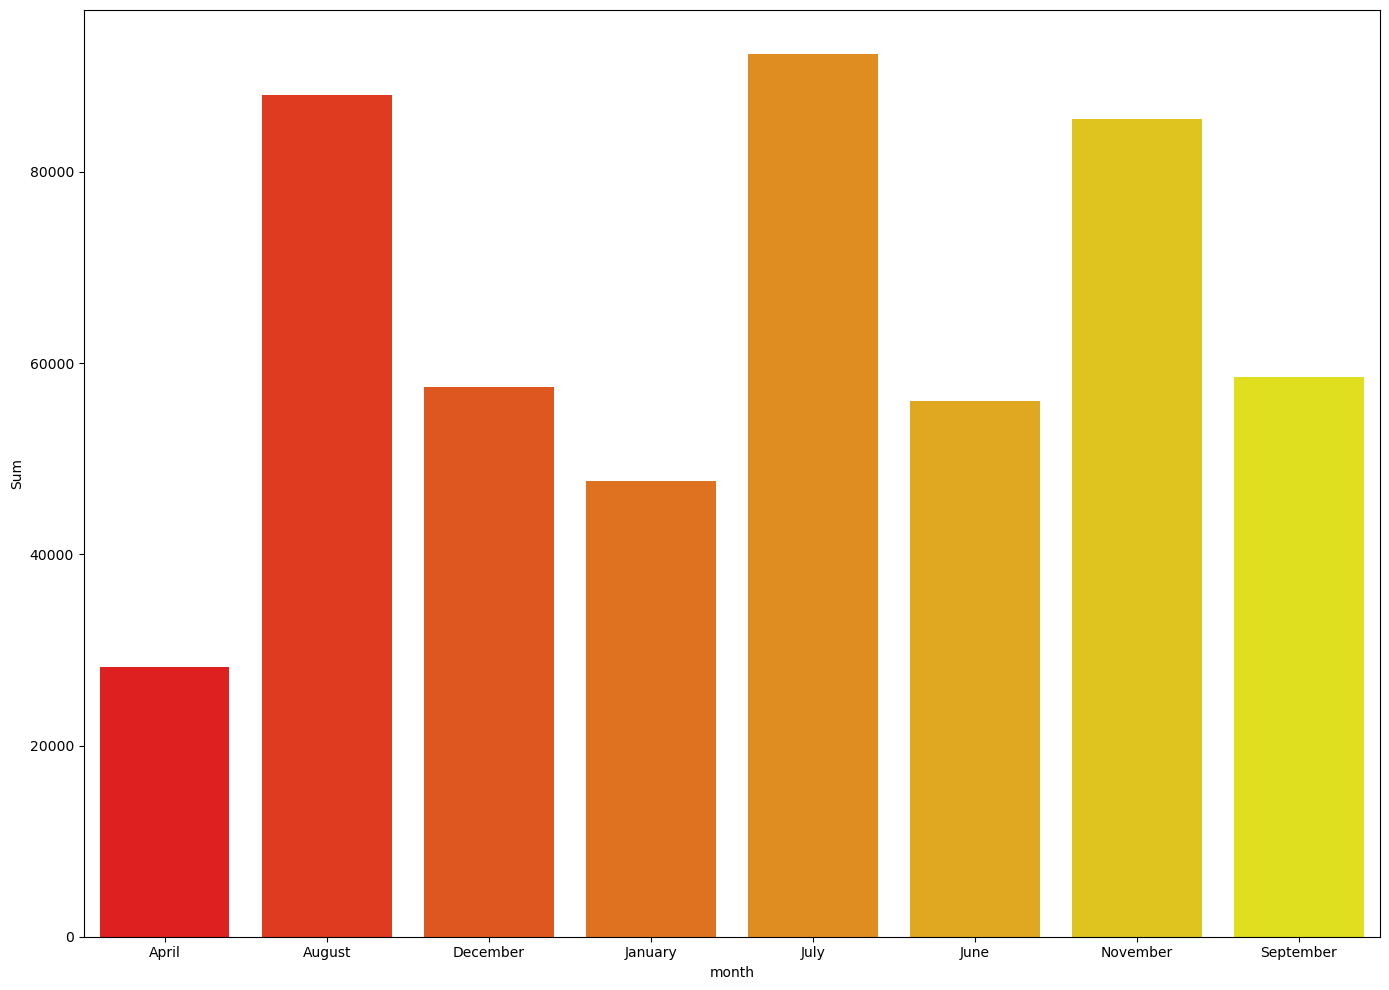

In [320]:
mpl.figure(figsize=(14,10))
sns.barplot(x=pivot_table.index, 
               y='number', 
               data= pivot_table, 
               palette=sns.blend_palette(["red","yellow"],8))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
mpl.title=("Sums of Fires registered each month")
mpl.xlabel= ("Month")
mpl.ylabel ("Sum")
mpl.tight_layout()
mpl.show()

based on this chart, July has the highest number of fires registered with a total of 92327 reports

In [ ]:
pivot_table2 = pd.pivot_table(df, values='number', index='year', aggfunc=np.sum)

print("Pivot table:")
print(pivot_table2)

NameError: name 'ax' is not defined

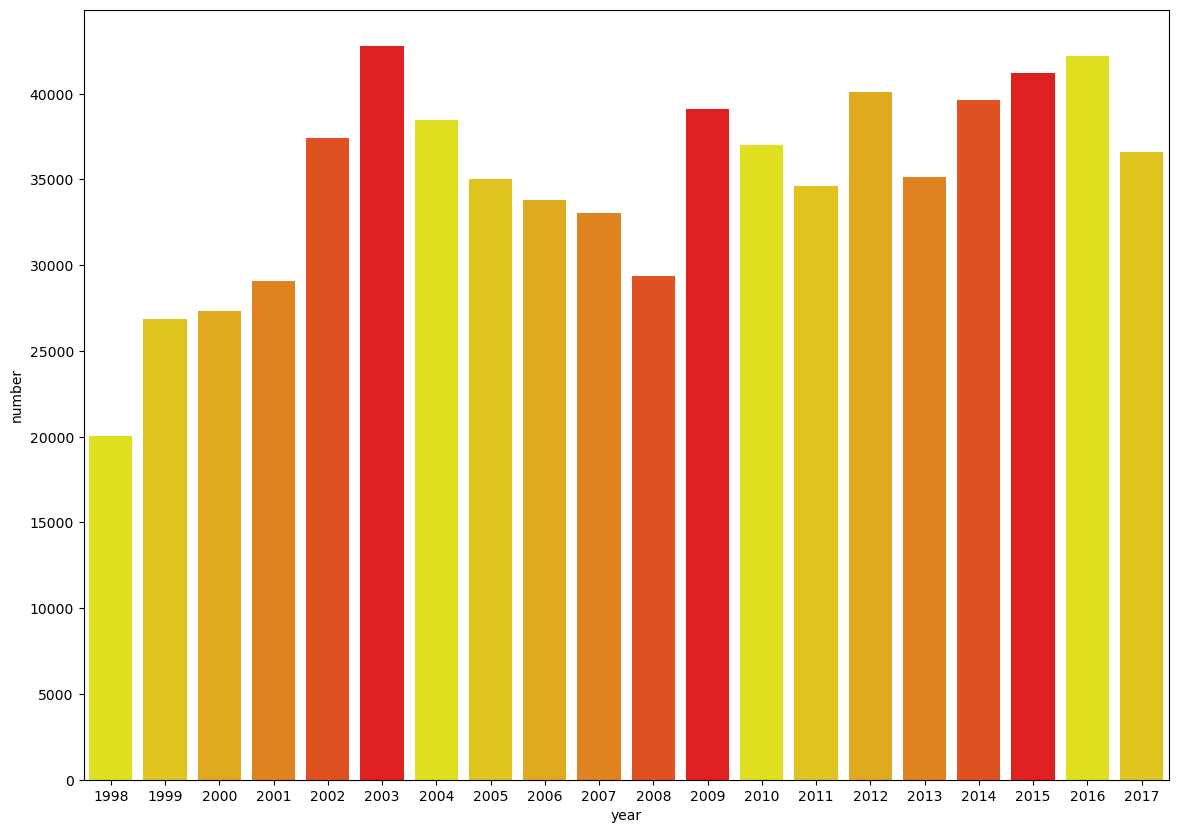

In [15]:
mpl.figure(figsize=(14,10))
sns.barplot(x=pivot_table2.index, 
            y='number', 
            data= pivot_table2,
            palette=sns.blend_palette(["yellow","orange","red"]))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
mpl.title=("Sums of Fires registered from 1998-2017")
mpl.xlabel= ("Year")
mpl.ylabel ("Sum")

mpl.tight_layout()
mpl.show()

based on this chart, 2003 has the highest number of forest fires repored with a total of 42761 reports

In [16]:
pivot_table3 = pd.pivot_table(df, values='number', index='state', aggfunc=np.sum)

print("Pivot table:")
print(pivot_table3)

Pivot table:
                     number
state                      
Acre              18464.030
Alagoas            4606.000
Amapa             21831.576
Amazonas          30650.129
Bahia             44746.226
Ceara             30428.063
Distrito Federal   3561.000
Espirito Santo     6546.000
Goias             37695.520
Maranhao          25129.131
Mato Grosso       96246.028
Minas Gerais      37475.258
Paraiba           52426.918
Pará              24512.144
Pernambuco        24498.000
Piau              37803.747
Rio               45094.865
Rondonia          20285.429
Roraima           24385.074
Santa Catarina    24359.852
Sao Paulo         51121.198
Sergipe            3237.000
Tocantins         33707.885


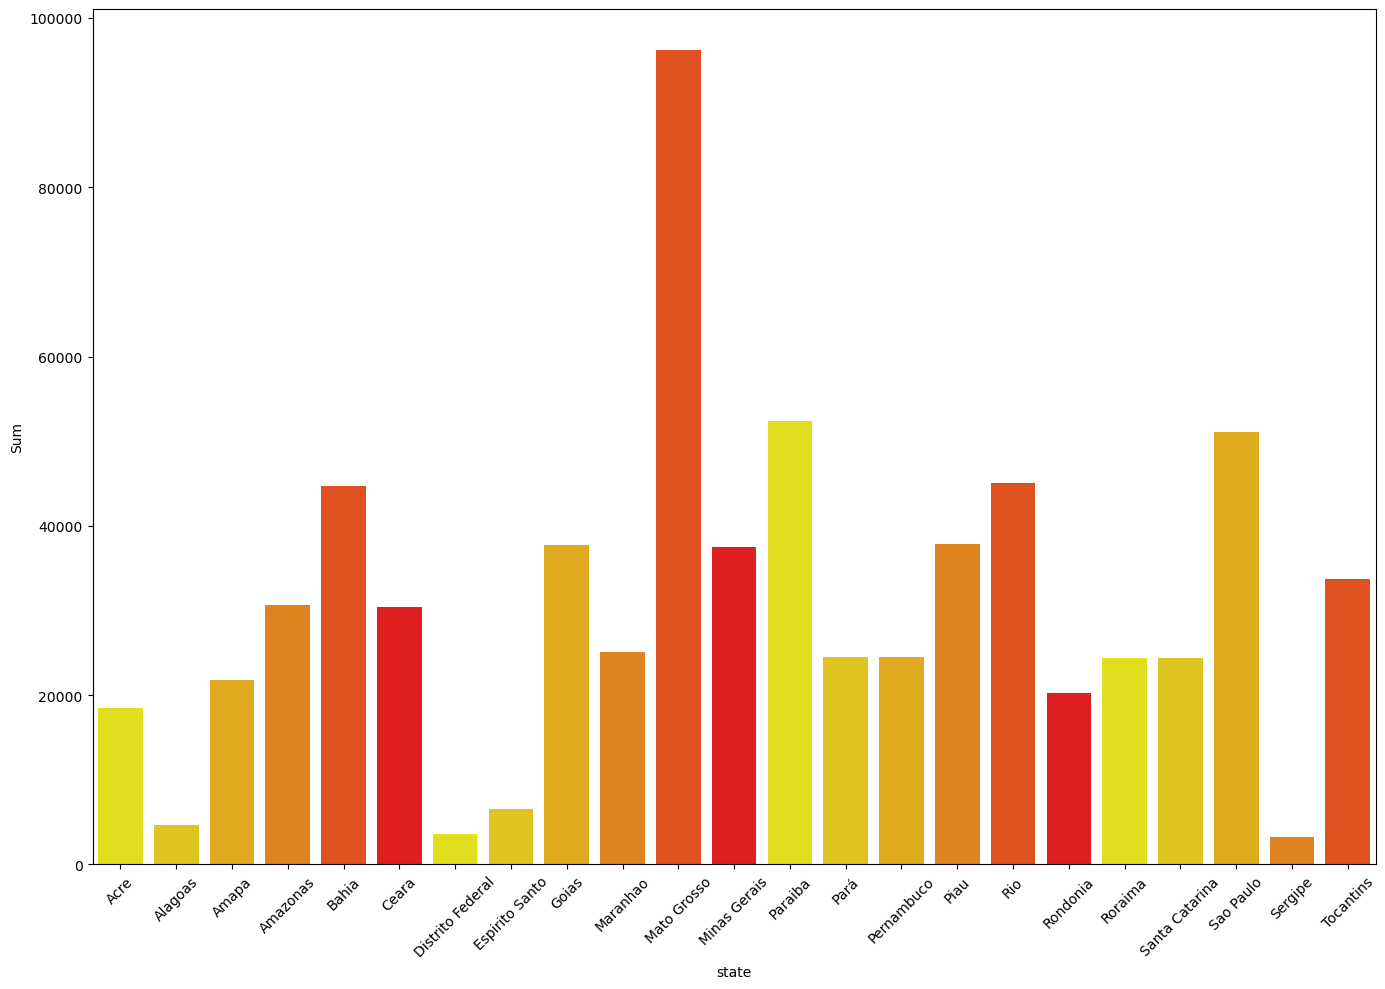

In [17]:
mpl.figure(figsize=(14,10))
ax=sns.barplot(x=pivot_table3.index, 
               y='number', 
               data= pivot_table3,
              palette=sns.blend_palette(["yellow","orange","red"]))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
mpl.title=("Sums of Fires registered from 1998-2017")
mpl.xlabel= ("State")
mpl.ylabel ("Sum")
mpl.tight_layout()
mpl.show()

Based on this chart, the state that highest number of reported forest fire is Mato Grosso with a total of 96247 reports

In [18]:
df_amazonas= df[df['state']=='Amazonas']
df_number= df_amazonas['number'].sum()
df_number_int=math.ceil(df_number)
print("Pivot table: ",df_number_int)

Pivot table:  30651


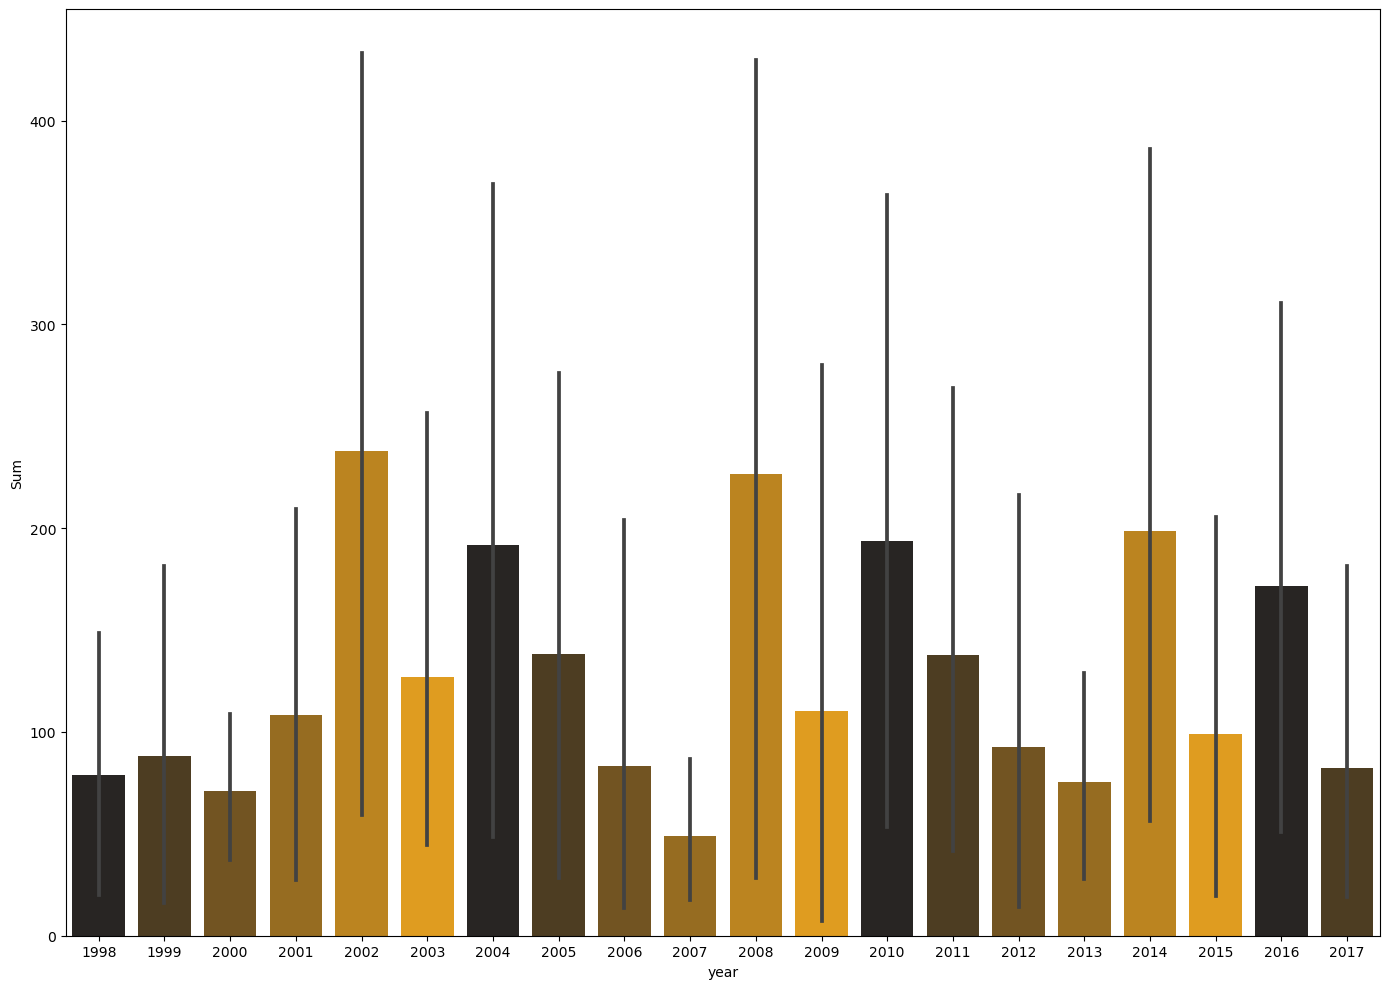

In [19]:
mpl.figure(figsize=(14,10))
ax=sns.barplot(x='year', 
               y='number', 
               data= df_amazonas,
              palette=sns.dark_palette('orange'))
mpl.title=("Sums of Fires registered in Amazonas from 1998-2017")
mpl.xlabel= ("Year")
mpl.ylabel ("Sum")
mpl.tight_layout()
mpl.show()

the chart shows that the fire reports peaked in 2007. however, the chart also shows a pattern that shows a sudden increase followed by a gradual decrease in the reports of over the years

In [20]:
df_amazonas= df[df['state']=='Amazonas']
df_number= df_amazonas.groupby('date')['number'].sum()

print("Pivot table: \n", df_number)

Pivot table: 
 date
1998-01-01     946.000
1999-01-01    1061.000
2000-01-01     853.000
2001-01-01    1297.000
2002-01-01    2852.000
2003-01-01    1524.268
2004-01-01    2298.207
2005-01-01    1657.128
2006-01-01     997.640
2007-01-01     589.601
2008-01-01    2717.000
2009-01-01    1320.601
2010-01-01    2324.508
2011-01-01    1652.538
2012-01-01    1110.641
2013-01-01     905.217
2014-01-01    2385.909
2015-01-01    1189.994
2016-01-01    2060.972
2017-01-01     906.905
Name: number, dtype: float64


In [21]:
df_2015 = df[df['year']==2015]
df_totalmonth = df_2015.groupby('month')['number'].sum()


print(df_totalmonth)

month
April        2573.000
August       4363.125
December     4088.522
January      4635.000
July         4364.392
June         3260.552
November     4034.518
September    2494.658
Name: number, dtype: float64


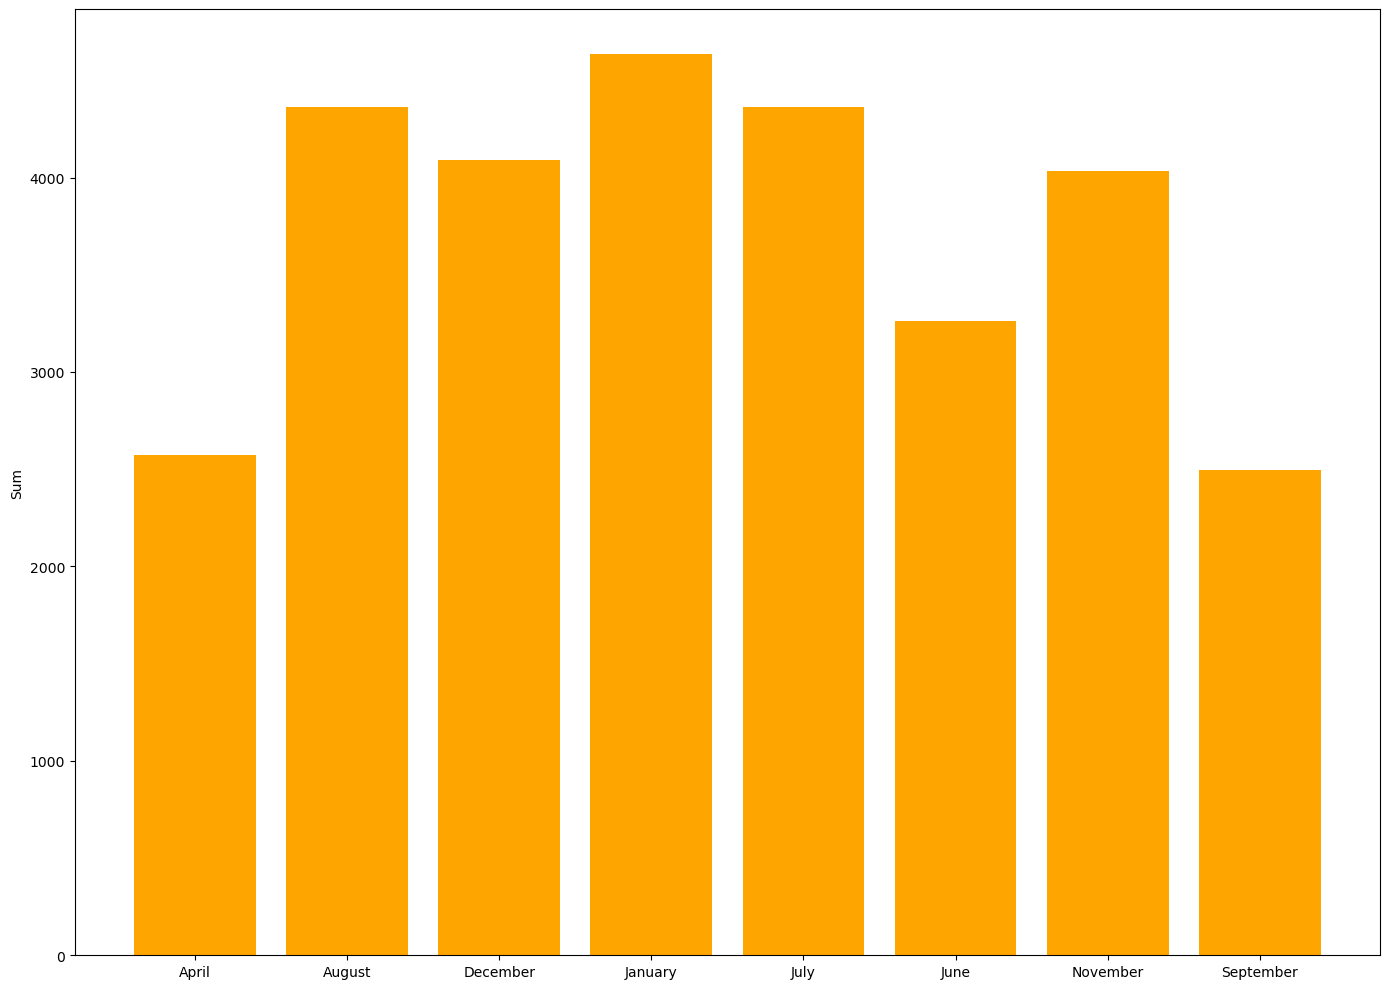

In [148]:

mpl.figure(figsize=(14,10))
mpl.bar(df_totalmonth.index,df_totalmonth.values, color='orange')
mpl.title=("Sums of Fires registered each month in 2015")
mpl.xlabel= ("Year")
mpl.ylabel ("Sum")
mpl.tight_layout()
mpl.show()

In [401]:
df_highest = df.groupby('state')['number'].mean().sort_values(ascending=False).to_frame()

df_highest

,number
state,
Sao Paulo,213.896226
Mato Grosso,203.479975
...,...
Distrito Federal,14.899582
Sergipe,13.543933


In this table, we can see that although the Mato Grasso has the highest number of fires reported, it only comes second to Sao Paulo when it comes to the highest average

In [24]:
df_dec= df[df['month']=='December']
df_state= df_dec['state'].unique()

print("States where fire was reported in december: ",df_state)

States where fire was reported in december:  ['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']


## MovieLens

In [388]:
df2_movies=pd.read_csv('movies.csv')
df2_movies.head(20)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...
18,19,Ace Ventura: When Nature Calls (1995),Comedy
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller


In [389]:
df2_ratings=pd.read_csv('ratings.csv')
df2_ratings.head(20)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
...,...,...,...,...
18,1,2632,5.0,1147878248
19,1,2692,5.0,1147869100


In [390]:
df2_tags=pd.read_csv('tags.csv')
df2_tags.head(20)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
...,...,...,...,...
18,19,7099,ecology,1445286153
19,19,7099,fantasy,1445286144


In [391]:
df2_links=pd.read_csv('links.csv')
df2_links.head(20)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
...,...,...,...
18,19,112281,9273.0
19,20,113845,11517.0


In [392]:
df2_gscore=pd.read_csv('genome-scores.csv')
df2_gscore.head(20)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
...,...,...,...
18,1,19,0.66250
19,1,20,0.30075


In [393]:
df2_gtags=pd.read_csv('genome-tags.csv')
df2_gtags.head(20)

,tagId,tag
0,1,007
1,2,007 (series)
...,...,...
18,19,action
19,20,action packed


# Number 1



In [175]:
df2=pd.read_csv('movies.csv')
mdf = df2.copy()

year = mdf['title'].str.findall('\((\d{4})\)').str.get(0)
mdf['year'] = year

mdf


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
...,...,...,...,...
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


In [176]:
df_number = mdf.groupby('year')['title'].count().to_frame()
df_number

,title
year,
1874,1
1878,1
...,...
2018,2034
2019,994


In [177]:
mdf['year'] = pd.to_numeric(mdf['year'])
df_year = mdf.groupby('year')['title'].count().to_frame()
df_year.columns = ['movie/s'] 
df_year['Change'] = df_year['movie/s'].pct_change()*100
df_year

,movie/s,Change
year,,
1874.0,1,NaN
1878.0,1,0.000000
...,...,...
2018.0,2034,-14.321820
2019.0,994,-51.130777


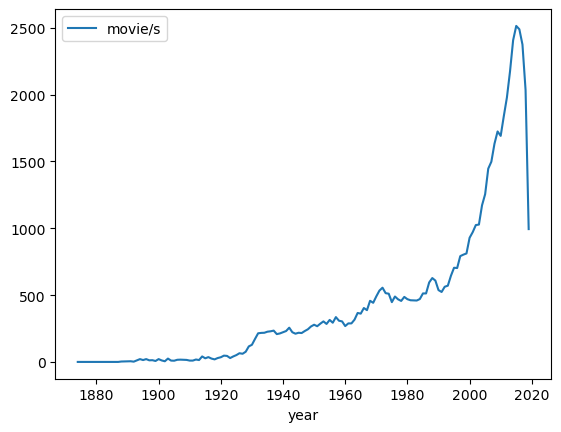

In [178]:
dfy_plot= df_year.plot(y='movie/s', rot=0)

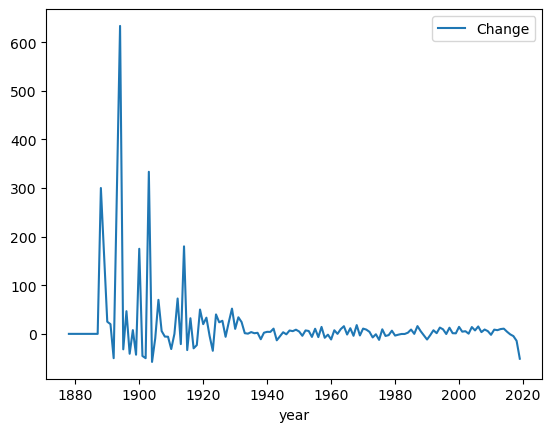

In [179]:
dfy_plot= df_year.plot(y='Change', rot=0)

# NUMBER 2

In [189]:

gnr = mdf.copy()

gnr['genres']=gnr['genres'].str.split('|')
gnr = gnr.explode('genres')

gnr

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure,1995.0
0,1,Toy Story (1995),Animation,1995.0
...,...,...,...,...
62422,209171,Women of Devil's Island (1962),Adventure,1962.0
62422,209171,Women of Devil's Island (1962),Drama,1962.0


In [181]:

rate = df2_ratings.copy()

movie_rate= rate.groupby(['movieId'])['rating'].mean().to_frame()

movie_rate

,rating
movieId,
1,3.893708
2,3.251527
...,...
209169,3.000000
209171,3.000000


In [193]:
genre_rate=pd.merge(movie_rate, gnr,on='movieId',how='inner')
genre_rate

,movieId,rating,title,genres,year
0,1,3.893708,Toy Story (1995),Adventure,1995.0
1,1,3.893708,Toy Story (1995),Animation,1995.0
...,...,...,...,...,...
106936,209171,3.000000,Women of Devil's Island (1962),Adventure,1962.0
106937,209171,3.000000,Women of Devil's Island (1962),Drama,1962.0


In [194]:
df_genrating = genre_rate.groupby('genres')['rating'].mean().to_frame()
df_genrating.columns = ['average rating']
df_genrating = df_genrating.sort_values(by='average rating', ascending=False)
df_genrating

,average rating
genres,
Documentary,3.382493
Film-Noir,3.318142
...,...
Sci-Fi,2.760530
Horror,2.650740


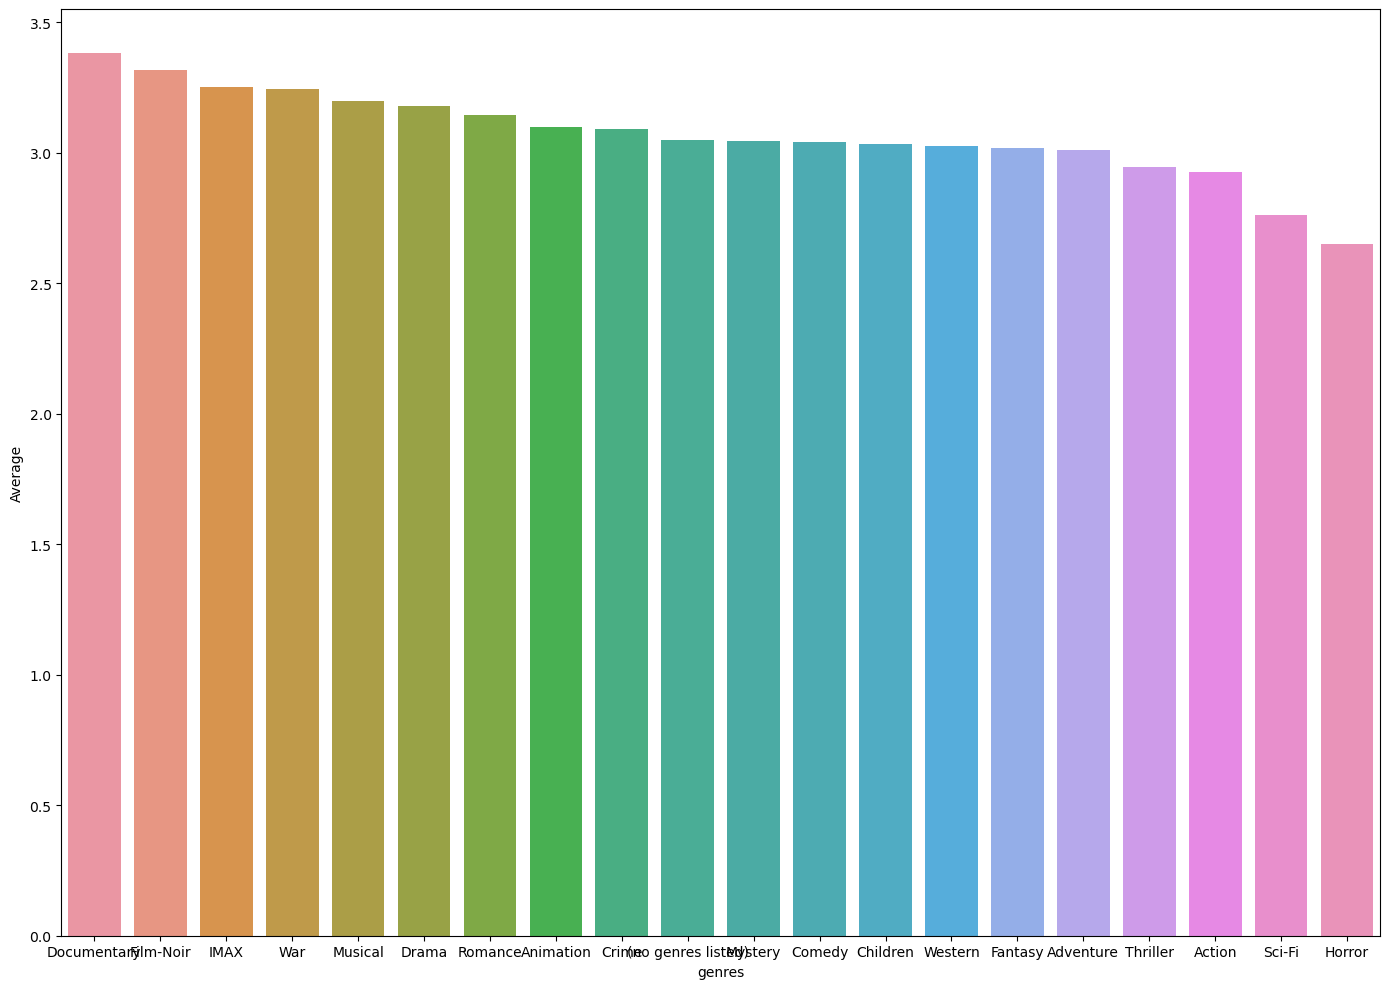

In [184]:
mpl.figure(figsize=(14,10))
ax=sns.barplot(x=df_genrating.index, 
               y='average rating', 
               data= df_genrating)
mpl.title=("Average Rating of Genres")
mpl.xlabel= ("Genre")
mpl.ylabel ("Average")
mpl.tight_layout()
mpl.show()

In [185]:
gdf = gnr.groupby(['genres'])['title'].count().to_frame().sort_values(by='title',ascending=False)
gdf.columns=['Total']
gdf

,Total
genres,
Drama,25606
Comedy,16870
...,...
Film-Noir,353
IMAX,195


<Axes: xlabel='genres'>

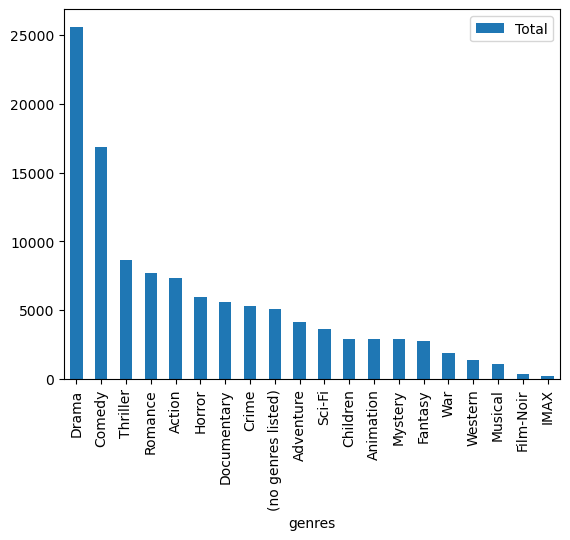

In [186]:
gdf.plot.bar()

# NUMBER 3

Does the taste of movies changes over time?


In [234]:
Dec_genrating= genre_rate.copy()

Dec_genrating['decade']=pd.cut(Dec_genrating['year'],np.arange(1869,2020,10),labels=['1870s','1880s','1890s',
                                                                                    '1900s','1910s','1920s',
                                                                                    '1930s','1940s','1950s',
                                                                                    '1960s','1970s','1980s',
                                                                                    '1990s','2000s','2010s',])
decgr=Dec_genrating.groupby(['decade','genres'])['rating'].mean().to_frame()

pivot_decgr=decgr.pivot_table(index='decade',columns='genres',values='rating')

pdecgr=pivot_decgr.copy()

plot_pdecgr = pivot_decgr.copy()
plot_pdecgr['decade']=pivot_decgr.index
plot_pdecgr = plot_pdecgr.reset_index(drop=True)
cols = plot_pdecgr.columns.tolist()
cols = cols[-1:] + cols[:-1]
plot_pdecgr = plot_pdecgr[cols]

g_list = plot_pdecgr.columns.to_list()

for i in range(len(g_list) - 1, -1, -1):
    if (g_list[i]== 'decade' or g_list[i]=='Action'or g_list[i]=='Thriller'or g_list[i]=='Drama' 
        or g_list[i]=='Comedy' or g_list[i] == 'Romance' ):
        del g_list[i]
        
plot_pdecgr.drop(labels=g_list,axis=1,inplace=True)

In [235]:
pdecgr

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,
1870s,2.909091,NaN,NaN,NaN,NaN,NaN,NaN,3.027778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880s,2.193182,NaN,NaN,NaN,NaN,NaN,NaN,2.431767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000s,3.010627,2.908030,2.950523,3.058930,2.901349,3.005531,3.095638,3.410153,3.151363,2.975191,3.270424,2.592622,3.284051,3.153986,3.027153,3.100240,2.777110,2.893199,3.249890,2.879840
2010s,3.176099,2.933045,2.987549,3.066554,3.039127,3.033780,3.110903,3.399634,3.188553,3.000664,3.124180,2.668152,3.225288,3.259440,3.050993,3.164712,2.819893,2.928169,3.190518,3.013517


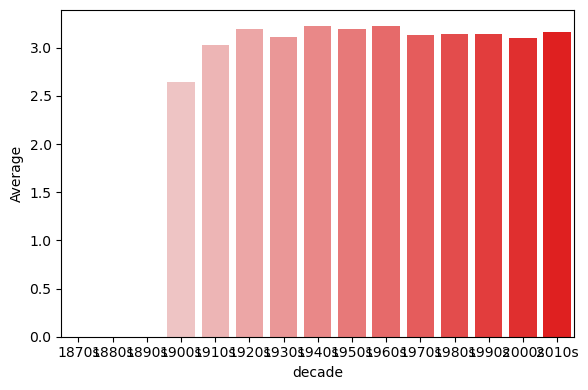

In [261]:
mpl.figure(figsize=(6,4))
ax=sns.barplot(x=pdecgr.index, 
               y=pdecgr['Romance'], 
               data= pdecgr,
              palette=sns.light_palette('red',15))
mpl.title=("Average Rating of Romance over the decades")
mpl.xlabel= ("Decade")
mpl.ylabel ("Average")
mpl.tight_layout()
mpl.show()

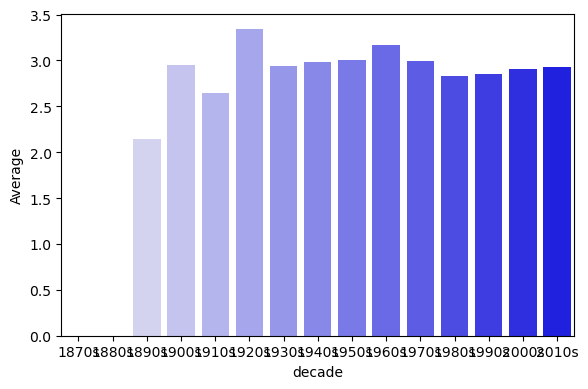

In [264]:
mpl.figure(figsize=(6,4))
ax=sns.barplot(x=pdecgr.index, 
               y=pdecgr['Action'], 
               data= pdecgr,
              palette=sns.light_palette('blue',15))
mpl.title=("Average Rating of Romance over the decades")
mpl.xlabel= ("Decade")
mpl.ylabel ("Average")
mpl.tight_layout()
mpl.show()

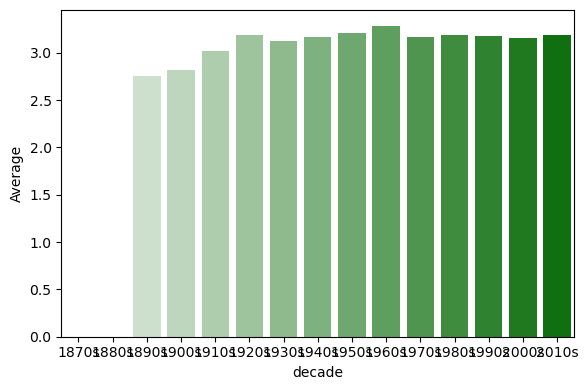

In [267]:
mpl.figure(figsize=(6,4))
ax=sns.barplot(x=pdecgr.index, 
               y=pdecgr['Drama'], 
               data= pdecgr,
              palette=sns.light_palette('green',15))
mpl.title=("Average Rating of Romance over the decades")
mpl.xlabel= ("Decade")
mpl.ylabel ("Average")
mpl.tight_layout()
mpl.show()

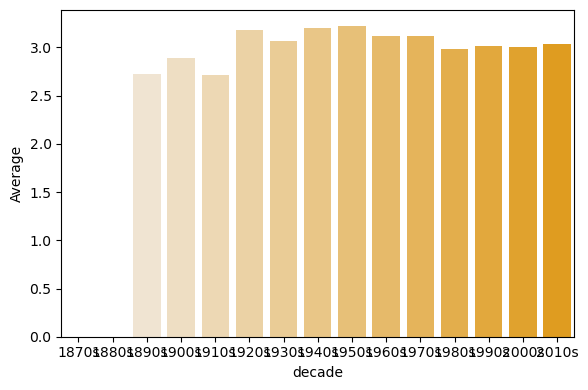

In [266]:
mpl.figure(figsize=(6,4))
ax=sns.barplot(x=pdecgr.index, 
               y=pdecgr['Comedy'], 
               data= pdecgr,
              palette=sns.light_palette('orange',15))
mpl.title=("Average Rating of Romance over the decades")
mpl.xlabel= ("Decade")
mpl.ylabel ("Average")
mpl.tight_layout()
mpl.show()

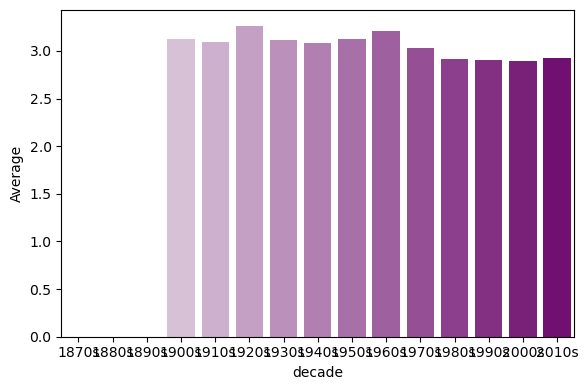

In [269]:
mpl.figure(figsize=(6,4))
ax=sns.barplot(x=pdecgr.index, 
               y=pdecgr['Thriller'], 
               data= pdecgr,
              palette=sns.light_palette('purple',15))
mpl.title=("Average Rating of Romance over the decades")
mpl.xlabel= ("Decade")
mpl.ylabel ("Average")
mpl.tight_layout()
mpl.show()

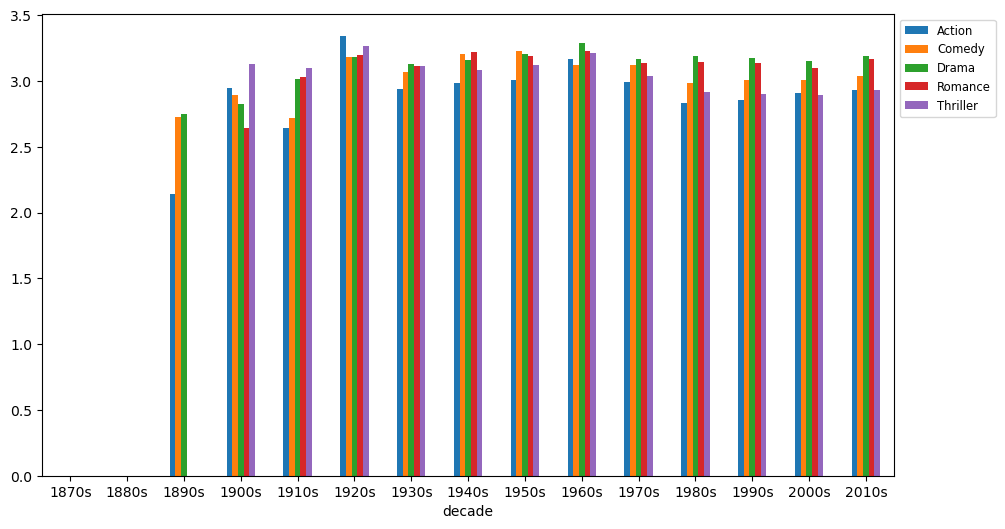

In [268]:
plot_pdecgr.plot.bar(x='decade',rot=0,figsize=(11,6)).legend(
    bbox_to_anchor=(1.0, 1.0),
    fontsize='small',
)

(Note: The five genres included in the chart were based on the top 5 genres with the highest number of ratings)
based on the chart we can see the emergence of the new genres. As time passed we can see that the ratings of these genres change too. in the 1920s we can see that Action movies have the highest average rating followed by Thriller. The change can be seen in the 1960's where we can see that Drama movies became the genre with the highest average rating.

# NUMBER 4

What are the top 20 movies that has the top amount of users rating and has the highest rate?


## Top 20 movies that has the top amount of users rating

In [343]:
movie_hsr=df2_ratings.copy()

movie_hsr['userId']=movie_hsr.index
movie_hsr = movie_hsr.reset_index(drop=True)
colum = movie_hsr.columns.tolist()
colum = colum[-1:] + colum[:-1]
movie_hsr = movie_hsr[colum]

mrating = pd.merge(movie_hsr,mdf,on='movieId')
mrating


,timestamp,userId,movieId,rating,title,genres,year
0,1147880044,0,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994.0
1,1439474476,264,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994.0
...,...,...,...,...,...,...,...
25000093,1554651417,24970609,200726,4.0,The Graduates (1995),Children|Drama,1995.0
25000094,1554651472,24970610,200728,4.0,Il pesce innamorato (1999),(no genres listed),1999.0


In [357]:
countrating=mrating.groupby(['title'])['rating'].agg(['count','mean']).sort_values(by='count', ascending=False)
countrating.columns=['Number of Ratings','Average Rating']
counttop20=countrating.head(20)
counttop20

,Number of Ratings,Average Rating
title,,
Forrest Gump (1994),81491,4.048011
"Shawshank Redemption, The (1994)",81482,4.413576
...,...,...
"Godfather, The (1972)",52498,4.324336
"Lord of the Rings: The Two Towers, The (2002)",51138,4.068051


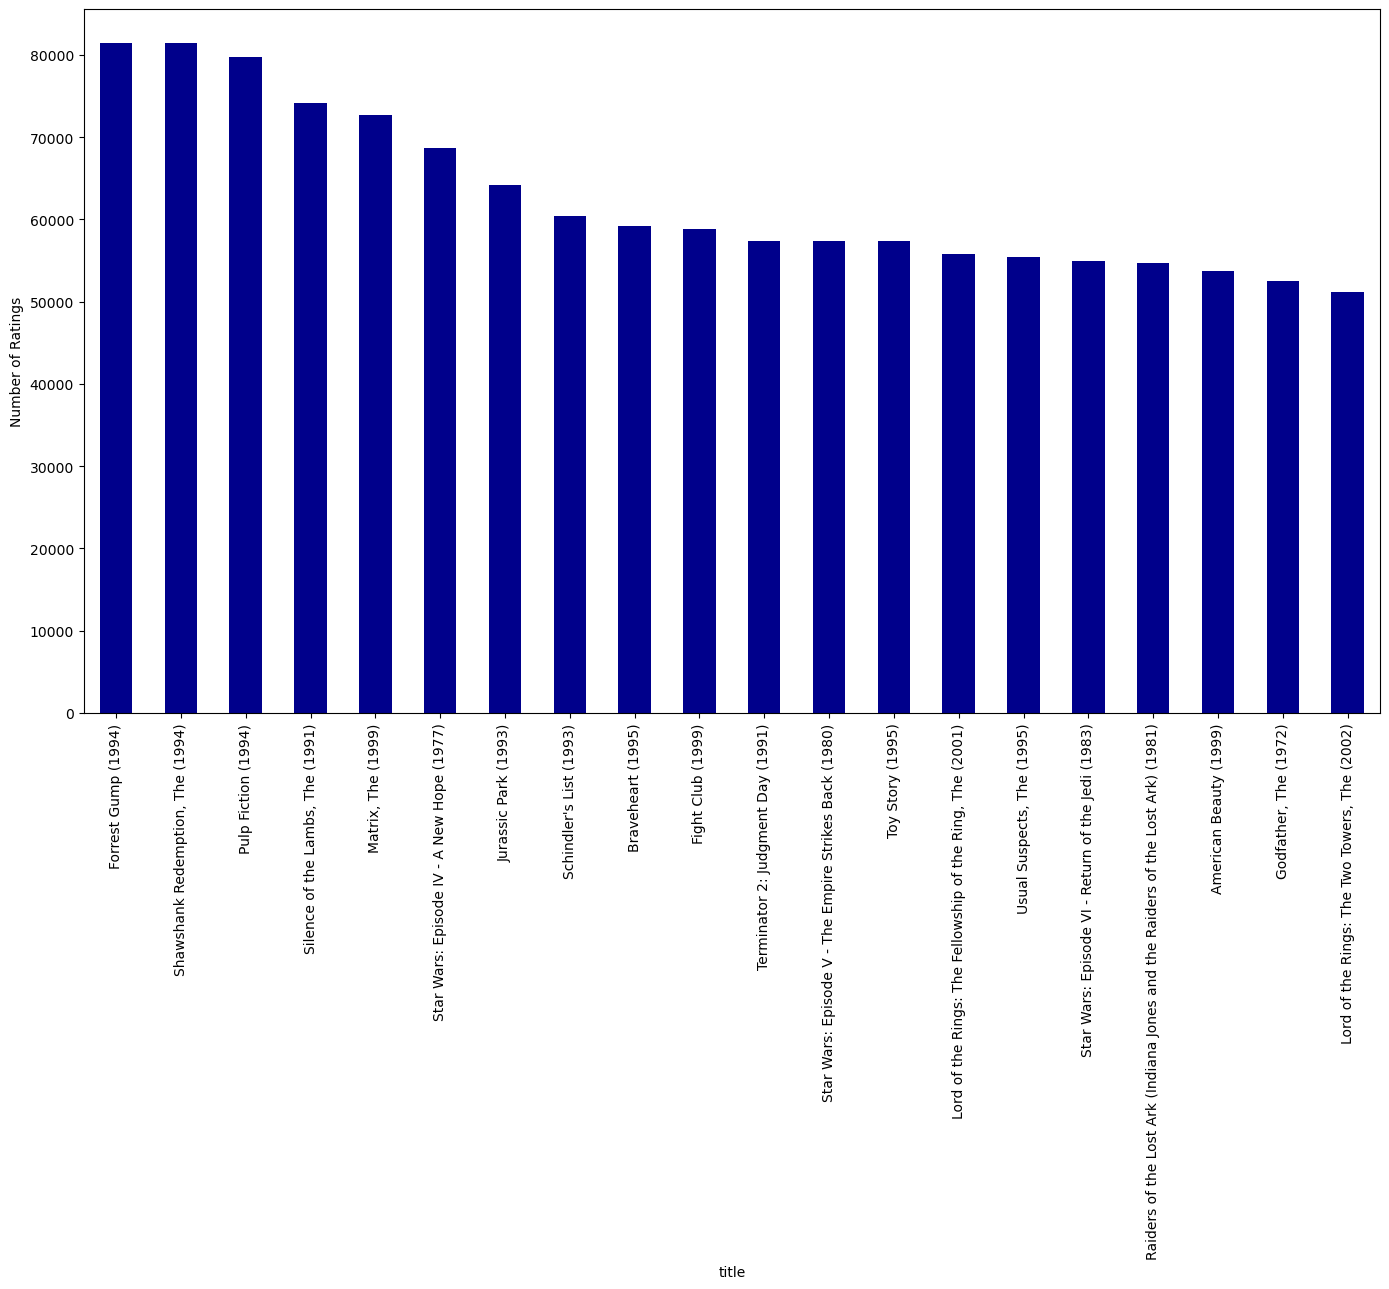

In [375]:
mpl.figure(figsize=(14,13))
counttop20['Number of Ratings'].plot(kind='bar', color='darkblue')
mpl.title=("Top 20 Movies with the Highest Number of Ratings")
mpl.xlabel= ("Movie")
mpl.ylabel ("Number of Ratings")
mpl.tight_layout()
mpl.show()

Forrest Gump is the movie that had the highest number of ratings followed by Shawshank Redemption which was only 9 ratings less than Forrest Gump.

In [376]:
sortrating=counttop20.sort_values(by='Average Rating',ascending=False)
rt20=ratetop20['Average Rating'].to_frame()
rt20

,Average Rating
title,
"Shawshank Redemption, The (1994)",4.413576
"Godfather, The (1972)",4.324336
...,...
Toy Story (1995),3.893708
Jurassic Park (1993),3.679175


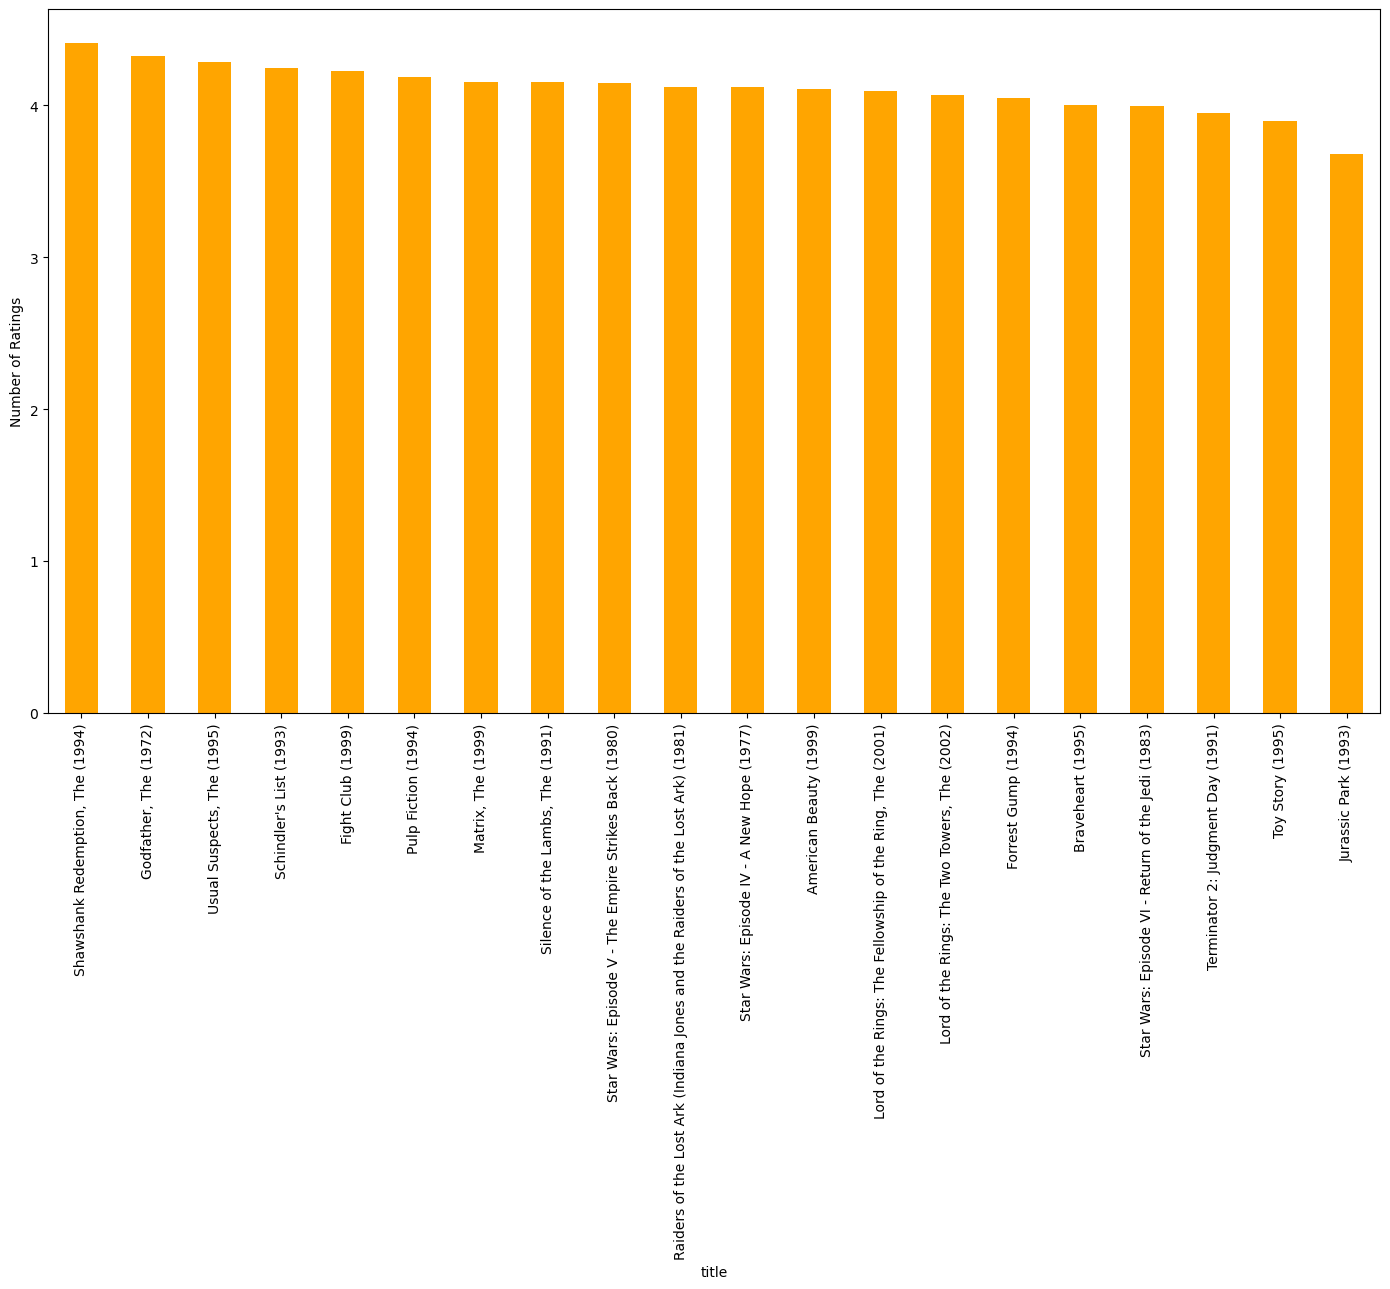

In [372]:
mpl.figure(figsize=(14,13))
rt20.plot(kind='bar', color='orange')
mpl.title=("Top 20 Movies with the Highest Rating")
mpl.xlabel= ("Movie")
mpl.ylabel ("Number of Ratings")
mpl.tight_layout()
mpl.show()

From the chart of movies with the highest number of ratings, The Shawshank Redemption has the highest average rating at a total of 4.41 followed by the The Godfather.

# NUMBER 5

What is the most of popular season for releasing movies?

In [395]:
time=pd.concat([df2_ratings,df2_tags])
time['date']=pd.to_datetime(time['timestamp'],unit='s')

time['season'] = time['date'].dt.month%12 // 3 + 1
time['season'] = time['season'].replace([1, 2, 3,4], ['winter', 'spring', 'summer','fall'])
time

,userId,movieId,rating,timestamp,tag,date,season
0,1,296,5.0,1147880044,NaN,2006-05-17 15:34:04,spring
1,1,306,3.5,1147868817,NaN,2006-05-17 12:26:57,spring
...,...,...,...,...,...,...,...
1093358,162534,189169,NaN,1527518181,disabled,2018-05-28 14:36:21,spring
1093359,162534,189169,NaN,1527518193,robbery,2018-05-28 14:36:33,spring


In [399]:
countmov=time.groupby(['season'])['movieId'].count().sort_values(ascending= False).to_frame()
countmov.columns= ['Interactions']
countmov

,Interactions
season,
fall,6589315
summer,6535369
winter,6522430
spring,6446341


<Figure size 1400x1300 with 0 Axes>

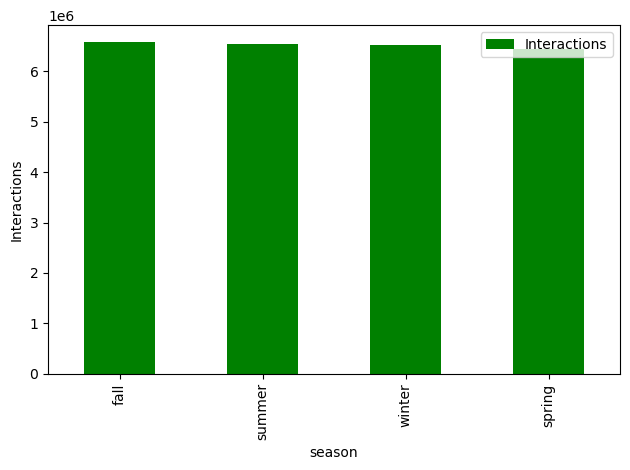

In [400]:
mpl.figure(figsize=(14,13))
countmov.plot(kind='bar', color='green')
mpl.title=("Interactions per Season")
mpl.xlabel= ("Seasons")
mpl.ylabel ("Interactions")
mpl.tight_layout()
mpl.show()

There's no observable difference among the interactions per season, however, Fall has the highest interaction among all the seasons